# Histogram of Bird Species

In [1]:
%load_ext autoreload
%autoreload 2

### testing Spark setup

In [2]:
# let's check that the initial data from murilo is theres
! gcloud storage ls gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023 | head

gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/eBird_Taxonomy_v2021.csv
gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/sample_submission.csv
gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/train_metadata.csv
gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/test_soundscapes/
gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/train_audio/


In [3]:
from birdclef.utils import get_spark
from IPython.display import Image, display

spark = get_spark()
display(spark)

# read straight from the bucket
df_meta = spark.read.csv(
    "gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/train_metadata.csv"
)
df_meta.printSchema()
df_meta.show(vertical=True, n=1, truncate=100)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/30 19:17:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)

-RECORD 0----------------
 _c0  | primary_label    
 _c1  | secondary_labels 
 _c2  | type             
 _c3  | latitude         
 _c4  | longitude        
 _c5  | scientific_name  
 _c6  | common_name      
 _c7  | author           
 _c8  | license          
 _c9  | rating           
 _c10 | url              
 _c11 | filename         
only showing top 1 row



In [4]:
df_meta.show(n=5)

+-------------+----------------+--------+--------+---------+------------------+--------------------+-------------+--------------------+------+--------------------+--------------------+
|          _c0|             _c1|     _c2|     _c3|      _c4|               _c5|                 _c6|          _c7|                 _c8|   _c9|                _c10|                _c11|
+-------------+----------------+--------+--------+---------+------------------+--------------------+-------------+--------------------+------+--------------------+--------------------+
|primary_label|secondary_labels|    type|latitude|longitude|   scientific_name|         common_name|       author|             license|rating|                 url|            filename|
|      abethr1|              []|['song']|  4.3906|  38.2788|Turdus tephronotus|African Bare-eyed...|Rolf A. de By|Creative Commons ...|   4.0|https://www.xeno-...|abethr1/XC128013.ogg|
|      abethr1|              []|['call']| -2.9524|  38.2921|Turdus tephrono

### Histogram of bird species

In [5]:
from matplotlib import pyplot as plt
import pandas as pd

# Group by species and count
species_counts = df_meta.groupBy("_c5").count().orderBy("count", ascending=False)

# Convert to Pandas DataFrame for plotting
species_df = species_counts.toPandas()

# Get the top and bottom 5 species
top_5 = species_df.head(5)
bottom_5 = species_df.tail(5)

# Combine top and bottom for plotting
combined = pd.concat([top_5, bottom_5])

/tmp/ipykernel_17497/746227582.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:111: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 4.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


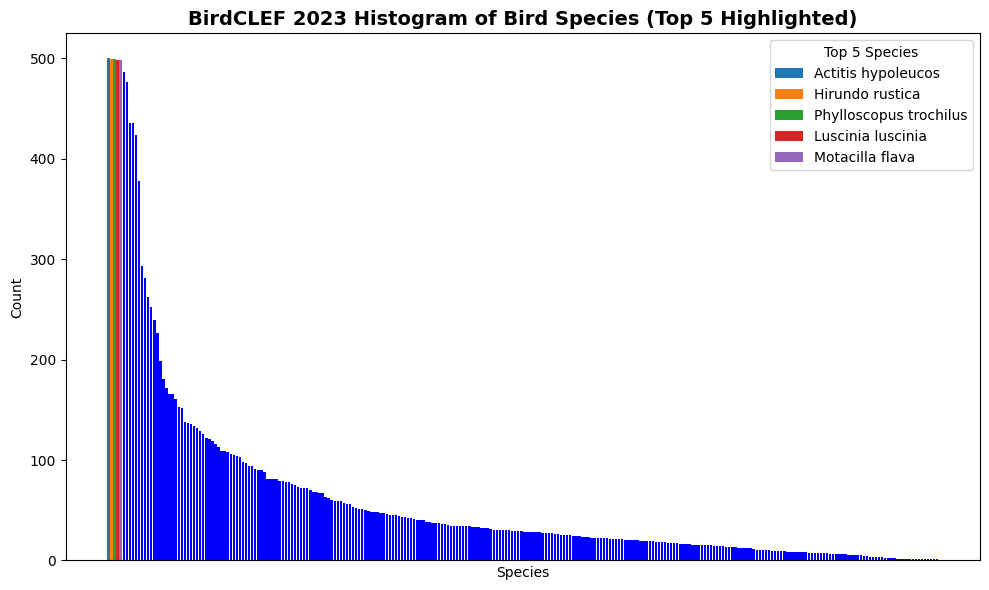

In [8]:
# Plotting
plt.figure(figsize=(10, 6), dpi=100)

# Plot all species
plt.bar(species_df["_c5"], species_df["count"], color="blue")

# Highlight the top 5 species in different colors
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
for i, row in top_5.iterrows():
    plt.bar(row["_c5"], row["count"], color=colors[i], label=row["_c5"])

plt.xlabel("Species")
plt.ylabel("Count")
plt.title(
    "BirdCLEF 2023 Histogram of Bird Species (Top 5 Highlighted)",
    weight="bold",
    fontsize=14,
)
plt.xticks([])
plt.legend(title="Top 5 Species")
plt.tight_layout()
plt.show()

In [7]:
# Number of distinct bird species
unique_species_count = df_meta.select("_c5").distinct().count()
print(f"Count of unique bird species: {unique_species_count}")

Count of unique bird species: 272
